In [1]:
# start with importing the libraries we need

%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hopfield_network import pattern_tools, plot_tools, network
import neurodynex3.hopfield_network.pattern_tools as tools

# Miniproject: Hopfield Networks

# 1. Theory

See report for theory answers

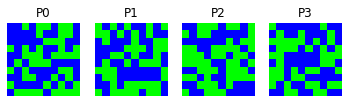

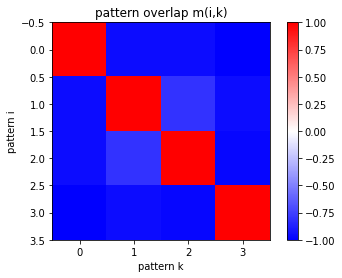

[array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

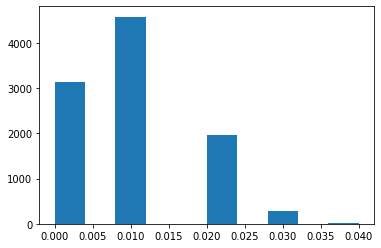

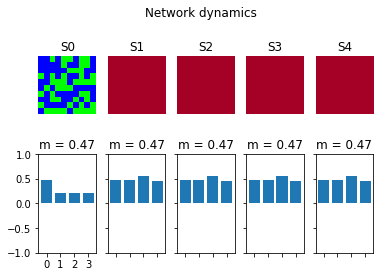

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [2]:
# Running a simulation for question 1.2 to highlight issue with having pattern values equal to 0 and 1

pattern_size = 10 # Pattern size, chosen so that pattern_size**2 = 100 = N

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

pattern_list = []
new_pattern_list = []

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=4, on_probability=0.5))

for i, pattern in enumerate(pattern_list):
    pattern = np.reshape(pattern, (1,pattern_size**2))
    for k in range(len(pattern[0])):
        if pattern[0][k] == -1:
            pattern[0][k] = 0 # Changing the pattern values so that they are equalt to either 0 or 1
    pattern = np.reshape(pattern, (pattern_size, pattern_size))
    new_pattern_list.append(pattern)

plot_tools.plot_pattern_list(new_pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(new_pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(new_pattern_list)

plt.figure()
plt.hist(hopfield_net.weights.flatten(),10)

hopfield_net.set_state_from_pattern(new_pattern_list[0])
#hopfield_net.set_state_from_pattern(0*new_pattern_list[0]) # even if we set the pattern to only zero values, all the values are converge to 1

# from this initial state, let the network dynamics evolve. 
states = hopfield_net.run_with_monitoring(nr_steps=4)
print(states)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, new_pattern_list, reference_idx=0, suptitle="Network dynamics")


# plt.figure()
# plt.hist(hopfield_net.weights.flatten(), 20)

print(states[4])

# 2. Capacity

### Question 2.2.

In [3]:
# Global variables

N = 100 # number of neurons considering for our pattern
T = 5 # time-steps for effectively stored patterns

pattern_size = 10 # Pattern size, chosen so that pattern_size**2 = 100 = N

# To obtain the probability that the first pattern is  is effectivley stored, we iterate the script a certain
# amount of time (number of hopfield models generated to estimate probability)
running_iterations_slow = 100
running_iterations_fast = 1000

#### Using code from neurodynex3 Python library:


In [4]:
# Number of patterns we are currently working with: (we are zooming in on the beginning by taking
# more points and thus have more precision there)
num_pattern_list_beginning = np.arange(1,16, 1)
num_pattern_list_end = np.arange(20, 55, 5)
num_pattern_list = np.concatenate((num_pattern_list_beginning, num_pattern_list_end), axis=None)
# When increasing number of patterns, retrieving probability
probability_list = []

In [5]:
print(num_pattern_list)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 20 25 30 35 40 45 50]


In [ ]:
for P in num_pattern_list:
    
    print('Running for '+str(P)+' patterns...')
    # create an instance of the class HopfieldNetwork
    hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

    # instantiate a pattern factory
    factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

    identical_count = 0
    
    for i in range(running_iterations_fast): # run the script some times

        pattern_list = []
        # add random patterns to the list (this value changes to obtain different probabilities for our plot)
        pattern_list.extend(factory.create_random_pattern_list(nr_patterns=P, on_probability=0.5))

        # let the hopfield network "learn" the patterns. Note: they are not stored
        # explicitly but only network weights are updated !
        hopfield_net.store_patterns(pattern_list)

        # initialize with original pattern
        hopfield_net.set_state_from_pattern(pattern_list[0])
        # from this initial state, let the network dynamics evolve. 
        states = hopfield_net.run_with_monitoring(nr_steps=T-1) # T-1 gets us to state 5

        # each network state is a vector. reshape it to the same shape used to create the patterns.
        states_as_patterns = factory.reshape_patterns(states)
        # plot the states of the network
        # plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")
    
        overlap_list = []
        
        overlap_list = pattern_tools.compute_overlap_list(states_as_patterns[-1], pattern_list)
        max_overlap = np.argmax(overlap_list)
 
        if (max_overlap == 0):
            identical_count += 1
        # More restrictive definition of stored patterns
        #if (np.sum(states_as_patterns[-1] == pattern_list[0])) == 100:
            # We have identical patterns, one neuron state was flipped after 5 iterations
            #identical_count += 1

    proba_correct = identical_count / running_iterations_fast
    print("Probability that our pattern was correctly retrieved:" +str(proba_correct))

    probability_list.append(proba_correct)

Running for 1 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 2 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 3 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 4 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 5 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 6 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 7 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 8 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 9 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 10 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 11 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 12 patterns...
Probability that our pattern was correctly retrieved:1.0
R

In [ ]:
# Plotting the probability for pattern p^1 to be effectively stored, as a function of the number of patterns

plt.figure()
plt.scatter(num_pattern_list, probability_list)
plt.xlabel('Number of patterns')
plt.ylabel('Probability')
plt.title('Probability of effectively storing pattern p^1 as a function of the number of patterns')
plt.grid(True)

For the slow Hopfield network, we used considerably less iterations given the computation time.  As a result, we have a higher variability.

#### Implementing alternative and more efficient method to store patterns: and checking if weights are still the same

In [9]:
# Using alternative and more efficient way to store patterns

class Hopfield_fast(network.HopfieldNetwork):
    def __init__(self, nr_neurons):
        super().__init__(nr_neurons)
    
    def store_patterns(self, pattern_list):
        # check if the input is a list or a numpy array
        if type(pattern_list) == list:
            pattern_list = np.array(pattern_list)
        pattern_list = pattern_list.reshape(pattern_list.shape[0],-1)
        pattern_size = pattern_list.shape[1]
        # fill in the following line for make the Hopfield_fast class to run
        self.weights = 1 / pattern_size  * np.einsum('ij,jk->ik', pattern_list.T, pattern_list) 
        np.fill_diagonal(self.weights, 0)

In [10]:
# Before you continue test that your weights are correct (compare with the neurodynex version)
P = 4
slow_hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
fast_hopfield_net = Hopfield_fast(pattern_size**2)

factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

pattern_list = []
# add random patterns to the list (this value changes to obtain different probabilities for our plot)
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=P, on_probability=0.5))

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
slow_hopfield_net.store_patterns(pattern_list)
fast_hopfield_net.store_patterns(pattern_list)

print(slow_hopfield_net.weights == fast_hopfield_net.weights)
print('All the weights are the same? '+str((slow_hopfield_net.weights == fast_hopfield_net.weights).all()))

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
All the weights are the same? True


#### Obtaining the plot using alternative and more efficient method to store patterns:

In [11]:
# Number of patterns we are currently working with:
num_pattern_list = np.arange(0, 101, 1)
#num_pattern_list = np.arange(0, 1001, 1)
num_pattern_list[0] = 1 # Solving issue with zero patterns...
print(num_pattern_list)

# When increasing number of patterns, retrieving probability
fast_probability_list = []

[  1   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


In [12]:
for P in num_pattern_list:
    
    print('Running for '+str(P)+' patterns...')
    # create an instance of the class HopfieldNetwork
    fast_hopfield_net = Hopfield_fast(nr_neurons= pattern_size**2)
    
    # instantiate a pattern factory
    factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

    identical_count = 0
    
    for i in range(running_iterations_fast): # run the script some times

        pattern_list = []
        # add random patterns to the list (this value changes to obtain different probabilities for our plot)
        pattern_list.extend(factory.create_random_pattern_list(nr_patterns=P, on_probability=0.5))

        # let the hopfield network "learn" the patterns. Note: they are not stored
        # explicitly but only network weights are updated !
        fast_hopfield_net.store_patterns(pattern_list)

        # initialize with original pattern
        fast_hopfield_net.set_state_from_pattern(pattern_list[0])
        # from this initial state, let the network dynamics evolve. 
        states = fast_hopfield_net.run_with_monitoring(nr_steps=T-1) # T-1 gets us to state 5

        # each network state is a vector. reshape it to the same shape used to create the patterns.
        states_as_patterns = factory.reshape_patterns(states)
        # plot the states of the network
        # plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

        overlap_list = []
        
        overlap_list = pattern_tools.compute_overlap_list(states_as_patterns[-1], pattern_list)
        max_overlap = np.argmax(overlap_list)
 
        if (max_overlap == 0):
            identical_count += 1
        # More restrictive definition of stored patterns
        #if (np.sum(states_as_patterns[-1] == pattern_list[0])) == 100:
            # We have identical patterns, one neuron state was flipped after 5 iterations
            #identical_count += 1

    proba_correct = identical_count / running_iterations_fast
    print("Probability that our pattern was correctly retrieved:" +str(proba_correct))

    fast_probability_list.append(proba_correct)

Running for 1 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 1 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 2 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 3 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 4 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 5 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 6 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 7 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 8 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 9 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 10 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 11 patterns...
Probability that our pattern was correctly retrieved:1.0
Ru

KeyboardInterrupt: 

In [ ]:
# Plotting the probability for pattern p^1 to be effectively stored, as a function of the number of patterns

plt.figure()
plt.scatter(num_pattern_list, fast_probability_list)
plt.xlabel('Number of patterns')
plt.ylabel('Probability')
plt.title('Probability of effectively storing pattern p^1 as a function of the number of patterns')
plt.grid(True)
plt.savefig('question22.png', bbox_inches='tight')

### Question 2.3.

In [ ]:
# Extracting empirical capacity:

# We are looking for the maximal number of patterns that the network can store with P = 0.99

fast_probability_list_array = np.array(fast_probability_list)
P_star_empirical = len(fast_probability_list_array[fast_probability_list_array >= 0.99]) # maximal value obtained where probability is still above or equal to 0.99

C_empirical = P_star_empirical / N

print("From the previous question, the empirical capacity is: "+str(C_empirical))

In [ ]:
# Comparing to theoretical capacity found in pen&pencil exercise 3 of week 5:
# Instead of having 1 flipped pixel over 10000, we have 1 flipped pixel over 100

# To have on average, at most, one bit to be wrong: corresponds to erf(sqrt(N/(2*(P-1)))) = 1-2/N = 0.98
import scipy.integrate as integrate
import scipy.special as special

# Defining error function so then can identify for which x we have 0.98
def erf(x):
    return integrate.quad(lambda t: 2/(np.sqrt(np.pi))*np.exp(-t**2), 0, x)

In [ ]:
# Testing out the function with the example of the P&P Exercise from week 5: we do obtain 0.9998
print(erf(2.6))

In [ ]:
print("When computing by hand, in order to have 0.98, we have x = np.sqrt(-np.log(0.02))")
print("The numerical value is therefore: "+str(np.sqrt(-np.log(0.02))))

print("When checking with the erf function we defined: ")
print(erf(np.sqrt(-np.log(0.02)))[0])

In [ ]:
# This gives us:

P_star_theoretical = 1 + N/(2*( np.sqrt(-np.log(0.02)) **2))

C_theoretical = P_star_theoretical/N

print("We deduce the theoretical capacity:"+str(C_theoretical))

# 3. From binary neurons to saturated rectified linear neurons

### Question 3.1

In [23]:
t_range = np.linspace(-10,10, 1000000)

def g(h, beta):
    return np.minimum(1, np.maximum(-1, beta*h))

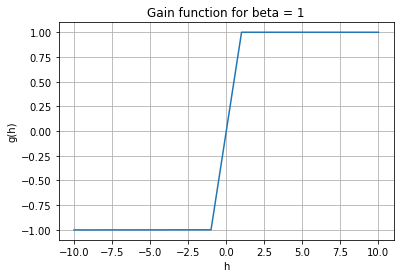

In [24]:
beta = 1
y_values = []

for t in t_range:
    y = g(t, beta)
    y_values.append(y)


plt.figure()
plt.plot(t_range, y_values)
plt.xlabel('h')
plt.ylabel('g(h)')
plt.title('Gain function for beta = 1')
plt.grid(True)
plt.savefig('question31.png', bbox_inches='tight')

### Question 3.2

See report for theoretical answer

### Question 3.3

In [29]:
betas = np.arange(1, 21, 1)
# betas[1:] = betas[1:]-1

print('Beta values:')
print(betas)

Beta values:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [30]:
num_pattern_list = np.arange(1,20,1)
num_pattern_list_ending = np.arange(20,110,10)
num_pattern_list = np.concatenate((num_pattern_list, num_pattern_list_ending), axis=None)
print(num_pattern_list)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  30  40  50  60  70  80  90 100]


In [31]:
def update_function(state_s0, weights):
    global beta
    random_neuron_idx_list = np.random.permutation(len(state_s0))
    state_s1 = state_s0.copy()
    for i in range(len(random_neuron_idx_list)):
        rand_neuron_i = random_neuron_idx_list[i]
        h_i = np.dot(weights[:, rand_neuron_i], state_s1)
        prop_state_s1_on = np.minimum(1, np.maximum(-1, beta*h_i))
        # the update here is probabilistic and in the next line we do the inference step
        state_s1[rand_neuron_i] = 1 if prop_state_s1_on > np.random.rand() else -1 
    return state_s1

In [33]:
capacity = []

for beta in betas:
    
    probability_list = []

    for P in num_pattern_list:

        hopfield_net = Hopfield_fast(nr_neurons= pattern_size**2)
        hopfield_net.set_dynamics_to_user_function(update_function)
        
        factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
        identical_count = 0

        for i in range(1000):
            pattern_list = []
            # add random patterns to the list
            pattern_list.extend(factory.create_random_pattern_list(nr_patterns=P, on_probability=0.5))
            # let the hopfield network "learn" the patterns. Note: they are not stored
            # explicitly but only network weights are updated !
            hopfield_net.store_patterns(pattern_list)
            # initialize with original pattern
            hopfield_net.set_state_from_pattern(pattern_list[0])
            # from this initial state, let the network dynamics evolve. 
            states = hopfield_net.run_with_monitoring(nr_steps=5) # T-1 gets us to state 5
            # each network state is a vector. reshape it to the same shape used to create the patterns.
            states_as_patterns = factory.reshape_patterns(states)

            # Computing the overlap
            overlap_list = []
            overlap_list = pattern_tools.compute_overlap_list(states_as_patterns[-1], pattern_list)
            max_overlap = np.argmax(overlap_list)
            if (max_overlap == 0): # if the overlap is maximal with pattern 1, then we increment the counting to then obtain the probability
                identical_count += 1


        proba_correct = identical_count / running_iterations_fast
        probability_list.append(proba_correct)

    probability_list = np.array(probability_list)
    P_star = len(probability_list[probability_list >= 0.99]) # maximal value obtained where probability is still above or equal to 0.99

    capacity.append(P_star/N)
    print('For Beta='+str(beta)+', The Capacity='+str(P_star/N))

For Beta=1, The Capacity=0.01
For Beta=2, The Capacity=0.09
For Beta=3, The Capacity=0.13
For Beta=4, The Capacity=0.14
For Beta=5, The Capacity=0.14
For Beta=6, The Capacity=0.15
For Beta=7, The Capacity=0.15
For Beta=8, The Capacity=0.15
For Beta=9, The Capacity=0.15
For Beta=10, The Capacity=0.15
For Beta=11, The Capacity=0.17
For Beta=12, The Capacity=0.15
For Beta=13, The Capacity=0.16
For Beta=14, The Capacity=0.15
For Beta=15, The Capacity=0.16
For Beta=16, The Capacity=0.16
For Beta=17, The Capacity=0.15
For Beta=18, The Capacity=0.16
For Beta=19, The Capacity=0.17
For Beta=20, The Capacity=0.16


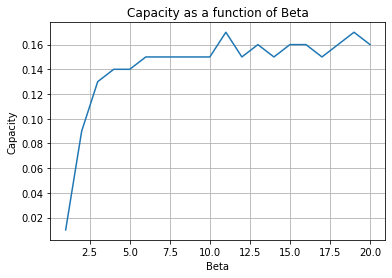

In [34]:
plt.plot(betas, capacity)
plt.xlabel('Beta')
plt.ylabel('Capacity')
plt.grid(True)
plt.title('Capacity as a function of Beta')
plt.savefig('question33.png', bbox_inches='tight')

###### Zooming into beta values which are closer to 0:

In [27]:
betas_begin = np.arange(1, 21, 1)
betas_end = np.arange(20,105,5)
betas = np.concatenate((betas_begin, betas_end), axis=None)

In [28]:
# Zooming in for beta values:
capacity_smaller_betas = []

for beta in betas:
    
    probability_list = []

    for P in num_pattern_list:

        hopfield_net = Hopfield_fast(nr_neurons= pattern_size**2)
        hopfield_net.set_dynamics_to_user_function(update_function)
        
        factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
        identical_count = 0

        for i in range(running_iterations_fast):
            pattern_list = []
            # add random patterns to the list
            pattern_list.extend(factory.create_random_pattern_list(nr_patterns=P, on_probability=0.5))
            # let the hopfield network "learn" the patterns. Note: they are not stored
            # explicitly but only network weights are updated !
            hopfield_net.store_patterns(pattern_list)
            # initialize with original pattern
            hopfield_net.set_state_from_pattern(pattern_list[0])
            # from this initial state, let the network dynamics evolve. 
            states = hopfield_net.run_with_monitoring(nr_steps=5) # T-1 gets us to state 5
            # each network state is a vector. reshape it to the same shape used to create the patterns.
            states_as_patterns = factory.reshape_patterns(states)
            # Computing the overlap
            overlap_list = []
            overlap_list = pattern_tools.compute_overlap_list(states_as_patterns[-1], pattern_list)
            max_overlap = np.argmax(overlap_list)
            if (max_overlap == 0): # if the overlap is maximal with pattern 1, then we increment the counting to then obtain the probability
                identical_count += 1

        proba_correct = identical_count / running_iterations_fast
        probability_list.append(proba_correct)

    probability_list = np.array(probability_list)
    P_star = len(probability_list[probability_list >= 0.99]) # maximal value obtained where probability is still above or equal to 0.99

    capacity_smaller_betas.append(P_star/N)
    print('For Beta='+str(beta)+', The Capacity='+str(P_star/N))

For Beta=1, The Capacity=0.0
For Beta=2, The Capacity=0.03
For Beta=3, The Capacity=0.06
For Beta=4, The Capacity=0.06
For Beta=5, The Capacity=0.07
For Beta=6, The Capacity=0.08
For Beta=7, The Capacity=0.08
For Beta=8, The Capacity=0.08
For Beta=9, The Capacity=0.09
For Beta=10, The Capacity=0.09
For Beta=11, The Capacity=0.08
For Beta=12, The Capacity=0.08
For Beta=13, The Capacity=0.08
For Beta=14, The Capacity=0.09
For Beta=15, The Capacity=0.09
For Beta=16, The Capacity=0.09
For Beta=17, The Capacity=0.09
For Beta=18, The Capacity=0.08
For Beta=19, The Capacity=0.1
For Beta=20, The Capacity=0.08
For Beta=20, The Capacity=0.07
For Beta=25, The Capacity=0.09
For Beta=30, The Capacity=0.08
For Beta=35, The Capacity=0.09
For Beta=40, The Capacity=0.09
For Beta=45, The Capacity=0.08
For Beta=50, The Capacity=0.08
For Beta=55, The Capacity=0.09
For Beta=60, The Capacity=0.08
For Beta=65, The Capacity=0.09
For Beta=70, The Capacity=0.08
For Beta=75, The Capacity=0.08
For Beta=80, The Ca

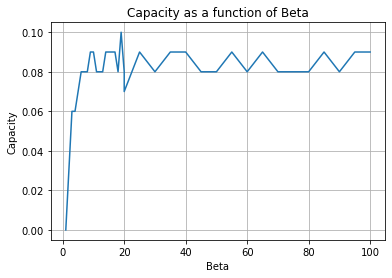

In [31]:
plt.plot(betas, capacity_smaller_betas)
plt.xlabel('Beta')
plt.ylabel('Capacity')
plt.grid(True)
plt.title('Capacity as a function of Beta')
plt.savefig('question33zoomedin.png', bbox_inches='tight')

### Question 3.4

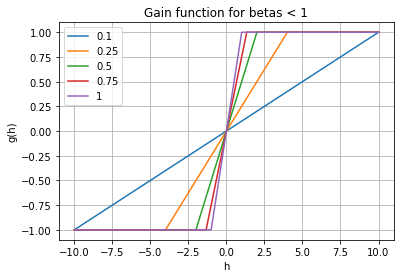

In [105]:
small_betas = [0.1, 0.25, 0.5, 0.75, 1]

plt.figure()

for beta in small_betas:
    y_values = []

    for t in t_range:
        y = g(t, beta)
        y_values.append(y)


    plt.plot(t_range, y_values, label = beta)
    plt.xlabel('h')
    plt.ylabel('g(h)')
    plt.title('Gain function for betas < 1')

plt.grid(True)
plt.legend()
plt.savefig('question34.png', bbox_inches='tight')

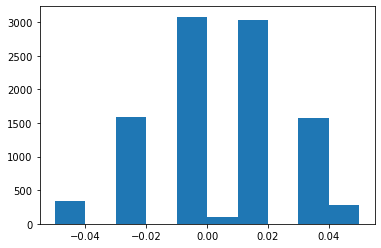

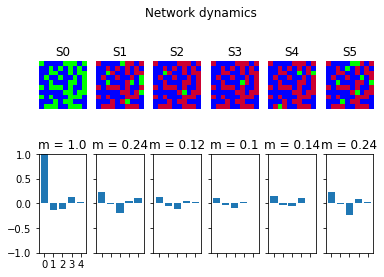

In [43]:
# Running a simulation with such a small beta value to see evolution:

# Defining values
small_beta = 0.25
beta = small_beta
pattern_size = 10 # Pattern size, chosen so that pattern_size**2 = 100 = N
number_patterns = 5

# create an instance of the class HopfieldNetwork
hopfield_net = Hopfield_fast(nr_neurons= pattern_size**2)
hopfield_net.set_dynamics_to_user_function(update_function)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

pattern_list = []

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=number_patterns, on_probability=0.5))

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

plt.figure()
plt.hist(hopfield_net.weights.flatten(),10)

hopfield_net.set_state_from_pattern(pattern_list[0])
#hopfield_net.set_state_from_pattern(0*new_pattern_list[0]) # even if we set the pattern to only zero values, all the values are converge to 1

# from this initial state, let the network dynamics evolve. 
states = hopfield_net.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")



# 4. Correlated Patterns

### Question 4.1

In [38]:
k_values = np.arange(0, 110, 10)
print("k_values: ")
print(k_values)

k_values: 
[  0  10  20  30  40  50  60  70  80  90 100]


In [39]:
num_pattern_list = np.arange(1, 101, 1)
print(num_pattern_list)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [40]:
capacity_k = []

for k in k_values:
    
    probability_list = []
    
    for P in num_pattern_list:

        # create an instance of the class HopfieldNetwork
        fast_hopfield_net = Hopfield_fast(nr_neurons= pattern_size**2)

        # instantiate a pattern factory
        factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

        identical_count = 0

        for i in range(1000): # run the script some times

            pattern_list = []
            # add random patterns to the list (this value changes to obtain different probabilities for our plot)
            pattern_list.extend(factory.create_random_pattern_list(nr_patterns=P, on_probability=0.5))

            ref_pattern = np.reshape(pattern_list[0], (1,pattern_size**2)) # reshaping so that can set the k first values to identical values
            
            new_pattern_list = []  # defining correlated patter list
            
            for i, pattern in enumerate(pattern_list):
                if i == 0:
                    new_pattern_list.append(np.reshape(ref_pattern, (pattern_size, pattern_size)))
                if i!=0:
                    pattern = np.reshape(pattern, (1,pattern_size**2))
                    pattern[0][:k+1] = ref_pattern[0][:k+1]
                    pattern = np.reshape(pattern, (pattern_size, pattern_size))
                    new_pattern_list.append(pattern)
                
            # let the hopfield network "learn" the patterns. Note: they are not stored
            # explicitly but only network weights are updated !
            fast_hopfield_net.store_patterns(new_pattern_list)

            # initialize with original pattern
            fast_hopfield_net.set_state_from_pattern(new_pattern_list[0])
            # from this initial state, let the network dynamics evolve. 
            states = fast_hopfield_net.run_with_monitoring(nr_steps=T-1) # T-1 gets us to state 5

            # each network state is a vector. reshape it to the same shape used to create the patterns.
            states_as_patterns = factory.reshape_patterns(states)
            # plot the states of the network
            # plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

            # Computing the overlap
            overlap_list = []
            overlap_list = pattern_tools.compute_overlap_list(states_as_patterns[-1], new_pattern_list)
            max_overlap = np.argmax(overlap_list)
            if (max_overlap == 0): # if the overlap is maximal with pattern 1, then we increment the counting to then obtain the probability
                identical_count += 1

        proba_correct = identical_count / running_iterations_fast
        #print("Probability that our pattern was correctly retrieved:" +str(proba_correct))

        probability_list.append(proba_correct)
        
    probability_list = np.array(probability_list)
    P_star = len(probability_list[probability_list >= 0.99]) # maximal value obtained where probability is still above or equal to 0.99

    print("For k = "+str(k)+": ")
    print("Capacity is equal to: "+str(P_star/N))
    capacity_k.append(P_star/N)

For k = 0: 
Capacity is equal to: 0.29
For k = 10: 
Capacity is equal to: 0.09
For k = 20: 
Capacity is equal to: 0.04
For k = 30: 
Capacity is equal to: 0.03
For k = 40: 
Capacity is equal to: 0.02
For k = 50: 
Capacity is equal to: 0.02
For k = 60: 
Capacity is equal to: 0.02
For k = 70: 
Capacity is equal to: 0.02
For k = 80: 
Capacity is equal to: 0.02
For k = 90: 
Capacity is equal to: 0.01
For k = 100: 
Capacity is equal to: 1.0


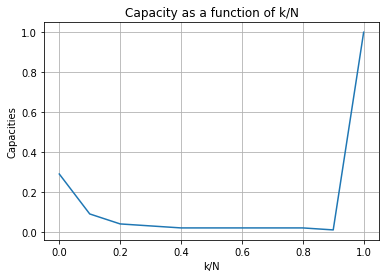

In [41]:
plt.figure()

k_range = k_values/N

plt.plot(k_range, capacity_k)
plt.xlabel('k/N')
plt.ylabel('Capacities')
plt.title('Capacity as a function of k/N')

plt.grid(True)
plt.savefig('question41.png', bbox_inches='tight')